In [1]:
%load_ext autoreload
%autoreload 2 

In [2]:
import logging 
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pylab as plt

from dagger.graph import DAG
from dagger.query import Query
from dagger.common import make_fake_df, normalise

logging.basicConfig(
    level=logging.DEBUG,
    format='%(asctime)s [%(filename)s:%(funcName)s:%(lineno)d] %(levelname)s - %(message)s',
)

2019-02-10 16:00:12,995 [pyplot.py:switch_backend:211] DEBUG - Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [3]:
df = pd.DataFrame({"a": [1, 1, 1, 1, 0, 0, 0, 0], 
                   "b": [0, 1, 0, 1, 1, 1, 1, 0], 
                   "c": [0, 0, 1, 0, 0, 1, 0, 1],
                   "d": [1, 1, 0, 1, 0, 0, 0, 0],
                   "e": [1, 1, 1, 1, 0, 0, 0, 0]})
dag = DAG(df).add_edge("a", "b").add_edge("a", "c").add_edge("c", "b")

2019-02-10 16:00:13,033 [graph.py:add_edge:134] DEBUG - created connection a -> b
2019-02-10 16:00:13,034 [graph.py:add_edge:134] DEBUG - created connection a -> c
2019-02-10 16:00:13,035 [graph.py:add_edge:134] DEBUG - created connection c -> b


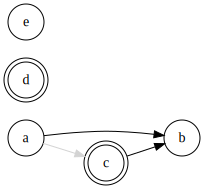

In [4]:
from graphviz import Digraph

def mkplot(dag, givens, dos):
    """A pretty plotting function."""
    d = Digraph()
    d.attr(rankdir='LR')
    d.attr('node', shape='circle')
    for n in dag.graph.nodes:
        if (n in givens) or (n in dos):
            d.node(n, shape='doublecircle')
        else:
            d.node(n)
    for n1, n2 in dag.graph.edges:
        if n2 in dos:
            d.edge(n1, n2, color="lightgray")
        else:
            d.edge(n1, n2)
    return d

mkplot(dag, givens=["d"], dos=["c"])

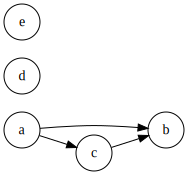

In [5]:
dag.plot()

2019-02-10 16:00:14,926 [graph.py:add_edge:134] DEBUG - created connection e -> a
2019-02-10 16:00:14,928 [graph.py:add_edge:134] DEBUG - created connection e -> d
2019-02-10 16:00:14,928 [graph.py:add_edge:134] DEBUG - created connection a -> d
2019-02-10 16:00:14,929 [graph.py:add_edge:134] DEBUG - created connection b -> d
2019-02-10 16:00:14,930 [graph.py:add_edge:134] DEBUG - created connection a -> b
2019-02-10 16:00:14,930 [graph.py:add_edge:134] DEBUG - created connection a -> c
2019-02-10 16:00:14,931 [graph.py:add_edge:134] DEBUG - created connection b -> c
2019-02-10 16:00:14,931 [graph.py:add_edge:134] DEBUG - created connection c -> f
2019-02-10 16:00:14,932 [graph.py:add_edge:134] DEBUG - created connection g -> f


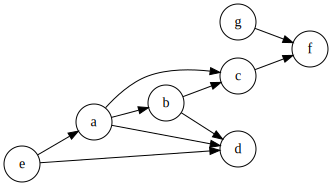

In [6]:
dag = (DAG(make_fake_df(7))
       .add_edge("e", "a")
       .add_edge("e", "d")
       .add_edge("a", "d")
       .add_edge("b", "d")
       .add_edge("a", "b")
       .add_edge("a", "c")
       .add_edge("b", "c")
       .add_edge("c", "f")
       .add_edge("g", "f"))

dag.plot()

2019-02-10 16:00:21,516 [query.py:_check_query_input:37] DEBUG - checking key d=1
2019-02-10 16:00:21,517 [query.py:_check_query_input:37] DEBUG - checking key a=0
2019-02-10 16:00:21,518 [query.py:_check_query_input:37] DEBUG - checking key c=1


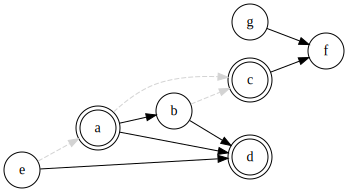

In [7]:
from dagger.query import Query

q = Query(dag).given(d=1).do(a=0, c=1)
q.plot()

In [8]:
q.infer()

2019-02-10 16:00:26,594 [query.py:infer:73] DEBUG - about to make an inference
2019-02-10 16:00:26,595 [query.py:inference_dag:26] DEBUG - constructing copy of original DAG nodes: ['a', 'b', 'c', 'd', 'e', 'f', 'g']
2019-02-10 16:00:26,596 [graph.py:add_edge:134] DEBUG - created connection a -> d
2019-02-10 16:00:26,597 [graph.py:add_edge:134] DEBUG - created connection a -> b
2019-02-10 16:00:26,597 [query.py:inference_dag:31] DEBUG - edge a -> c ignored because of do operator
2019-02-10 16:00:26,598 [graph.py:add_edge:134] DEBUG - created connection b -> d
2019-02-10 16:00:26,599 [query.py:inference_dag:31] DEBUG - edge b -> c ignored because of do operator
2019-02-10 16:00:26,599 [graph.py:add_edge:134] DEBUG - created connection c -> f
2019-02-10 16:00:26,600 [query.py:inference_dag:31] DEBUG - edge e -> a ignored because of do operator
2019-02-10 16:00:26,600 [graph.py:add_edge:134] DEBUG - created connection e -> d
2019-02-10 16:00:26,601 [graph.py:add_edge:134] DEBUG - created c

{'c': {1: 0.9999999999999999},
 'g': {0: 0.4, 1: 0.5999999999999999},
 'e': {0: 0.4702600685742815, 1: 0.5297399314257184},
 'a': {0: 0.9999999999999999},
 'b': {0: 0.44266570994264354, 1: 0.5573342900573564},
 'd': {1: 0.9999999999999999},
 'f': {0: 0.543578947368421, 1: 0.4564210526315789}}

In [9]:
Query(dag).given(d=1).do(a=1, c=1).infer()

2019-02-10 16:00:31,349 [query.py:_check_query_input:37] DEBUG - checking key d=1
2019-02-10 16:00:31,350 [query.py:_check_query_input:37] DEBUG - checking key a=1
2019-02-10 16:00:31,351 [query.py:_check_query_input:37] DEBUG - checking key c=1
2019-02-10 16:00:31,352 [query.py:infer:73] DEBUG - about to make an inference
2019-02-10 16:00:31,352 [query.py:inference_dag:26] DEBUG - constructing copy of original DAG nodes: ['a', 'b', 'c', 'd', 'e', 'f', 'g']
2019-02-10 16:00:31,353 [graph.py:add_edge:134] DEBUG - created connection a -> d
2019-02-10 16:00:31,353 [graph.py:add_edge:134] DEBUG - created connection a -> b
2019-02-10 16:00:31,354 [query.py:inference_dag:31] DEBUG - edge a -> c ignored because of do operator
2019-02-10 16:00:31,355 [graph.py:add_edge:134] DEBUG - created connection b -> d
2019-02-10 16:00:31,355 [query.py:inference_dag:31] DEBUG - edge b -> c ignored because of do operator
2019-02-10 16:00:31,356 [graph.py:add_edge:134] DEBUG - created connection c -> f
2019

{'c': {1: 1.0000000000000002},
 'g': {0: 0.4000000000000001, 1: 0.6000000000000001},
 'e': {0: 0.36099009623600936, 1: 0.6390099037639907},
 'a': {1: 1.0000000000000002},
 'b': {0: 0.5385434322775857, 1: 0.4614565677224145},
 'd': {1: 1.0000000000000002},
 'f': {0: 0.5435789473684212, 1: 0.45642105263157895}}

Next up: testing for independencies. 

In [10]:
import itertools as it 
import networkx as nx

In [11]:
list(nx.all_simple_paths(dag.graph.to_undirected(), "b", "g"))

[['b', 'a', 'c', 'f', 'g'],
 ['b', 'd', 'a', 'c', 'f', 'g'],
 ['b', 'd', 'e', 'a', 'c', 'f', 'g'],
 ['b', 'c', 'f', 'g']]

In [12]:
nx.k_components(dag.graph.to_undirected())

{2: [{'a', 'b', 'c', 'd', 'e'}], 1: [{'a', 'b', 'c', 'd', 'e', 'f', 'g'}]}